In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
hand_written = load_digits()
print("Hand written keys : {}".format(hand_written.keys()))
print("Target names : {}".format(hand_written["target_names"]))
print("Data shape : {}".format(hand_written["data"].shape))
print("Target shape : {}".format(hand_written["target"].shape))
print("First 5 samples : {}".format(hand_written["data"][:5]))
print("Feature names : {}".format(hand_written["feature_names"]))
print("DESCR : {}".format(hand_written["DESCR"]))
print("Images : {}".format(hand_written["images"]))

Hand written keys : dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Target names : [0 1 2 3 4 5 6 7 8 9]
Data shape : (1797, 64)
Target shape : (1797,)
First 5 samples : [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  

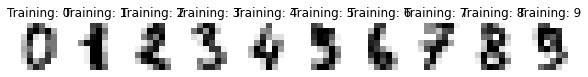

In [25]:
X_train, X_test, y_train, y_test = train_test_split(hand_written["data"], hand_written["target"], random_state = 0)
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))

for ax, image, label in zip(axes, hand_written["images"], hand_written["target"]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [59]:
hand_written_df = pd.DataFrame(X_train, columns = hand_written["feature_names"])
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

im = Image.open("1.png","r")
pix_val = np.array(list(im.getdata()))

print("My image length : {}".format(len(pix_val)))
# pix_val = pix_val.reshape(8, 8)
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# axes[0].set_axis_off()
# axes[0].imshow(pix_val, cmap=plt.cm.gray_r, interpolation="nearest")
print(knn.predict([pix_val]))

My image length : 64
[1]


In [27]:
y_predict = knn.predict(X_test)

print("Test set predictions : {}".format(y_predict))
print("Test set score : {}".format(np.mean(y_predict == y_test)))
print("Test set score : {}".format(knn.score(X_test, y_test)))


Test set predictions : [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 3 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]
Test set score : 0.9911111111111112
Test set score : 0.99111111